# Exploratory Data Analysis (EDA)

**Project:** Brain GNN Transcriptomics  
**Goal:** Visualize single-cell RNA-seq data (ROSMAP synthetic/real) to understand cell type clusters and pathology distribution.

## Steps
1. Load processed data (`.h5ad`)
2. Visualize Quality Control metrics
3. Dimensionality Reduction (PCA, UMAP)
4. Cell Type Clustering & Annotation
5. Diagnosis/Pathology Overlay

In [9]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

### 1. Load Data

In [10]:
adata = sc.read_h5ad('../data/processed/rosmap_proc.h5ad')
adata

AnnData object with n_obs × n_vars = 1000 × 20000
    obs: 'diagnosis', 'cell_type', 'batch', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'
    obsm: 'X_pca'

### 2. Visualize QC Stats
Checking distributions of gene counts and mitochondrial content.

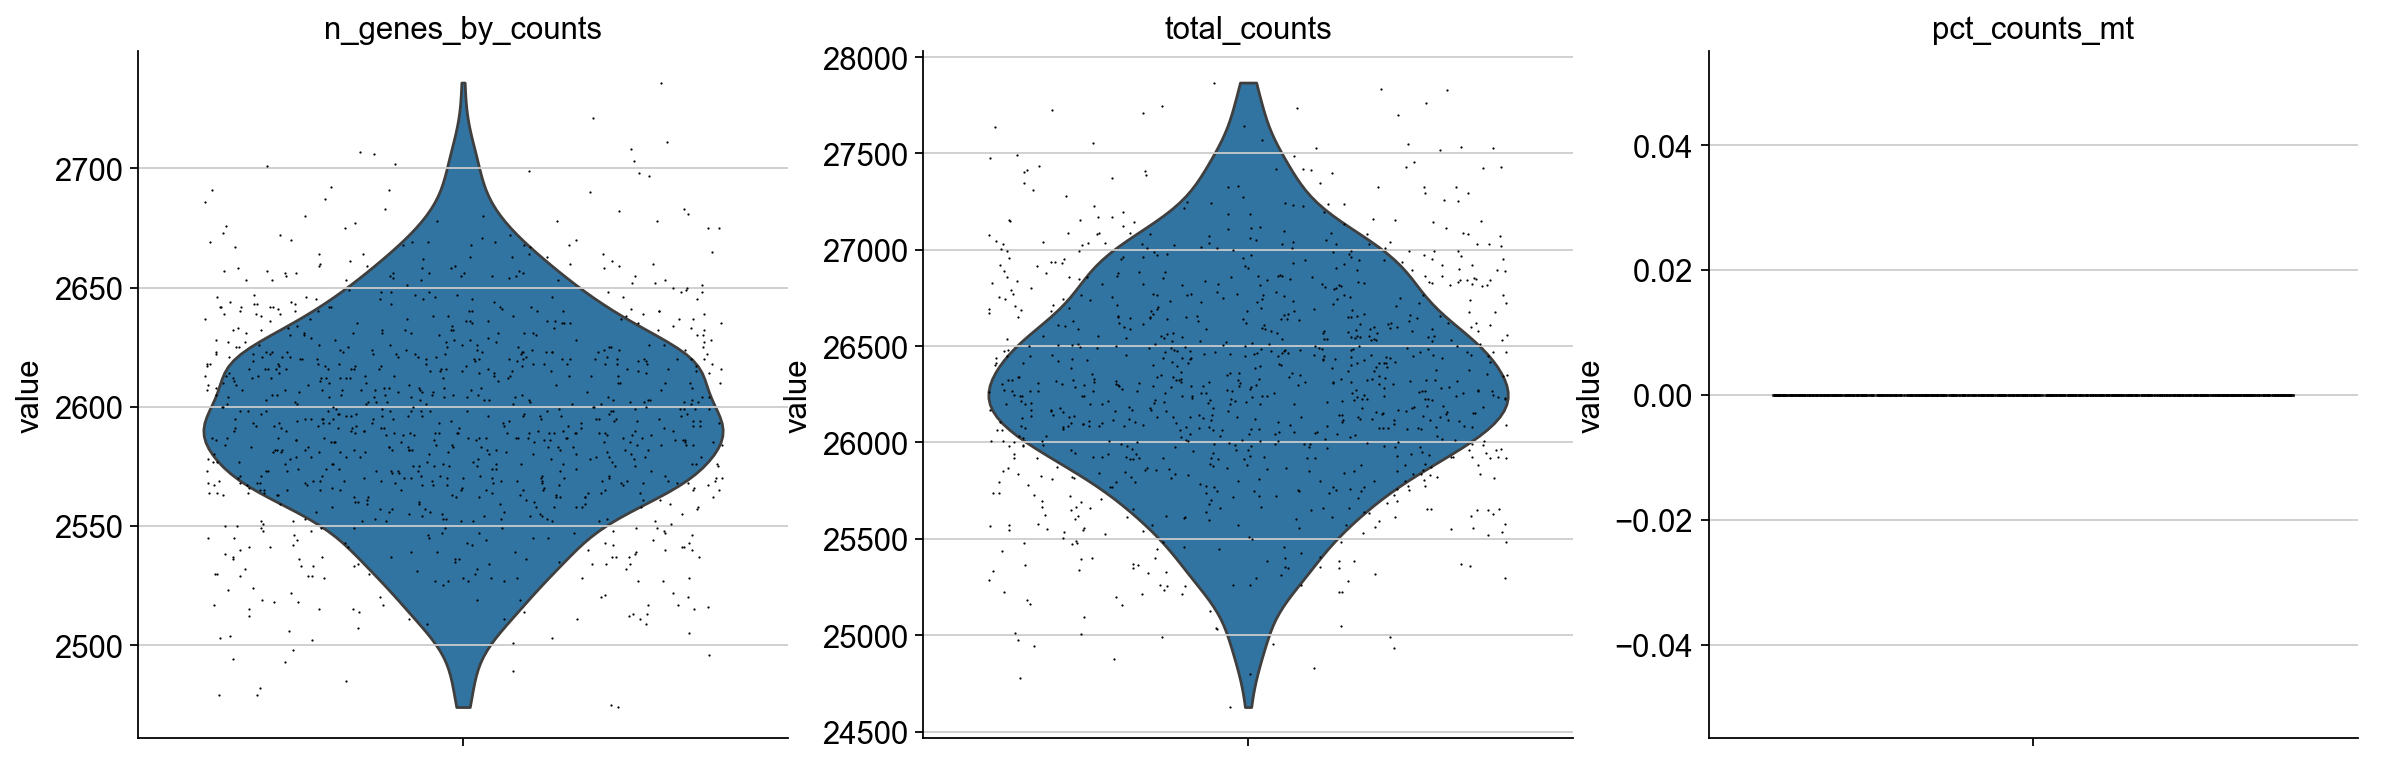

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

### 3. Dimensionality Reduction (UMAP)
Computing Neighborhood Graph and UMAP embedding.

In [12]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


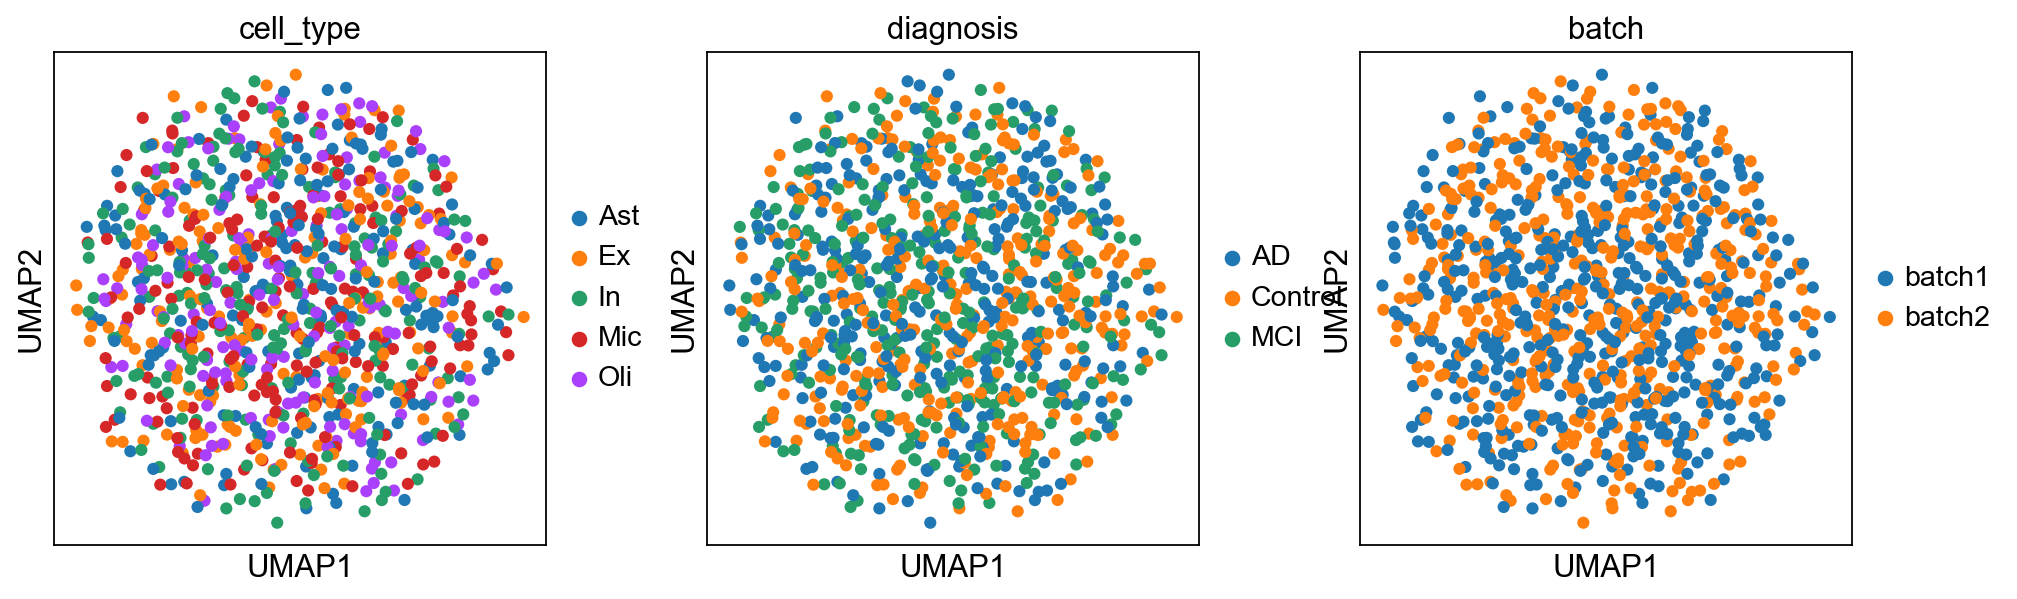

In [13]:
sc.pl.umap(adata, color=['cell_type', 'diagnosis', 'batch'])

### 4. Clustering (Leiden)
Unsupervised clustering to identify potential sub-populations.

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


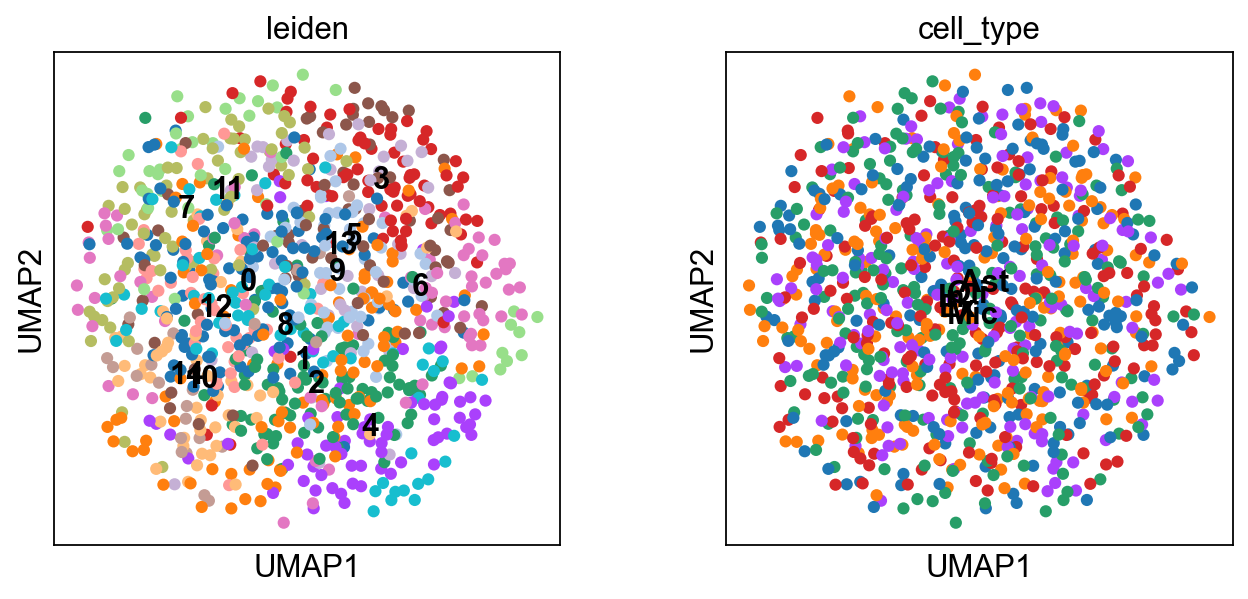

In [14]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden', 'cell_type'], legend_loc='on data')

### 5. Diagnosis Distribution
How do AD and Control cells distribute across clusters?

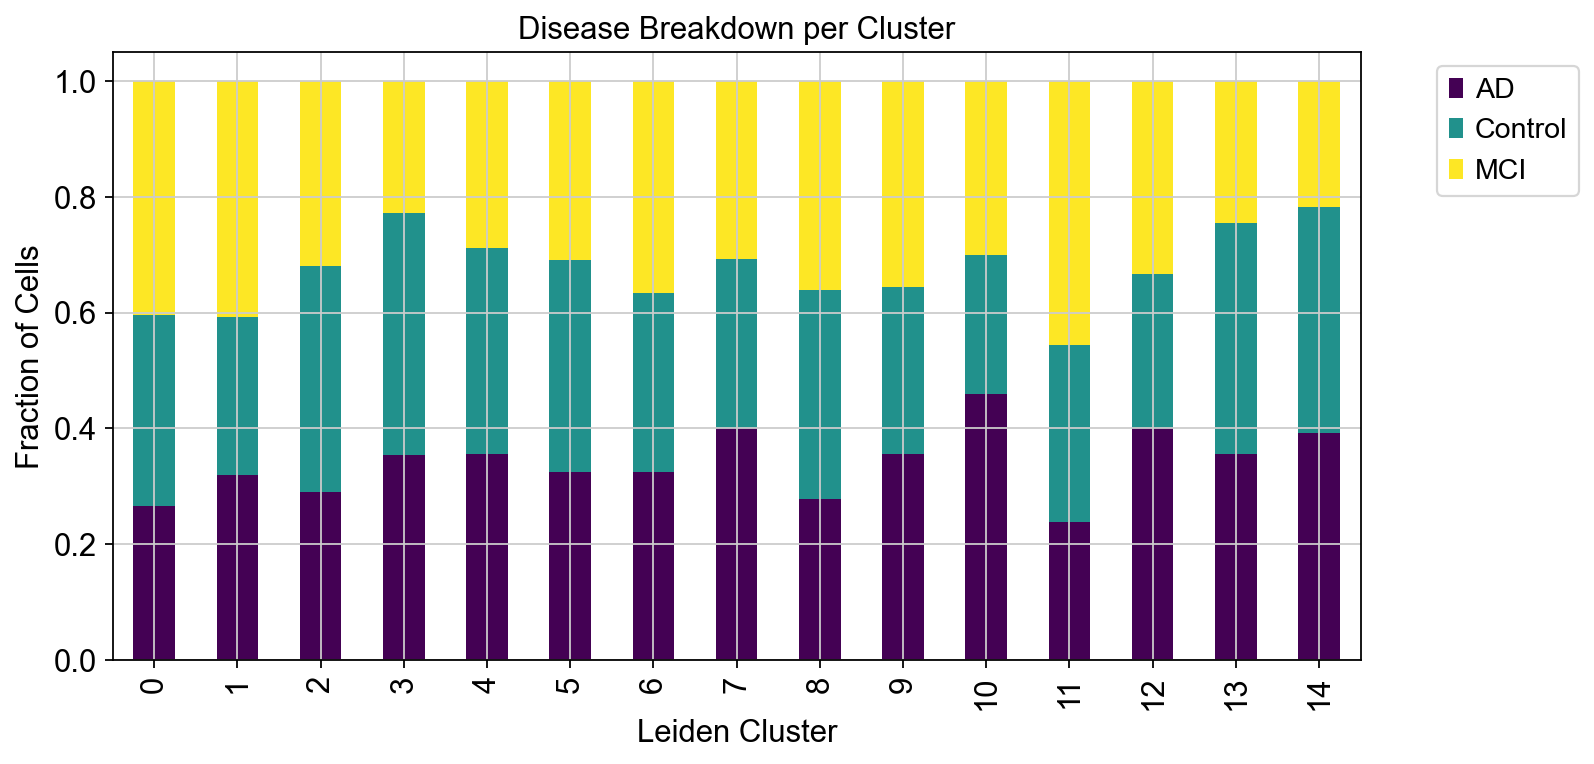

In [15]:
ct_counts = pd.crosstab(adata.obs['leiden'], adata.obs['diagnosis'], normalize='index')
ct_counts.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.xlabel('Leiden Cluster')
plt.ylabel('Fraction of Cells')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Disease Breakdown per Cluster')
plt.show()